## ==============================================================================
# Phase 0 : Configuration de l'environnement et chargement des données
## ==============================================================================

In [1]:
# cd "C:\Users\donfa\OneDrive\Desktop\PROJET INFO DES"

C:\Users\donfa\OneDrive\Desktop\PROJET INFO DES


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Pour des visualisations plus esthétiques
from wordcloud import WordCloud
import re # Expressions régulières pour le nettoyage de texte
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # Pour le stemming 
from nltk.stem import WordNetLemmatizer # Alternative au stemming (souvent mieux)
nltk.download('punkt') # Nécessaire pour word_tokenize
nltk.download('stopwords') # Stopwords
nltk.download('wordnet') # Nécessaire pour WordNetLemmatizer
nltk.download('omw-1.4') # Nécessaire pour WordNetLemmatizer

# Configuration de Pandas 
pd.options.mode.chained_assignment = None # Désactive un avertissement spécifique
pd.set_option('display.max_columns', None) # Affiche toutes les colonnes
pd.set_option('display.max_colwidth', 100) # Affiche plus de texte dans les colonnes

# Chargement du dataset
df = pd.read_csv("Data/sentiment_analysis.csv")

print("Configuration terminée et données chargées.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\donfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\donfa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\donfa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\donfa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Configuration terminée et données chargées.


## ==============================================================================
# Phase 1 : Exploration initiale et nettoyage de base
## ==============================================================================

In [4]:
print("Aperçu des premières lignes du DataFrame :")
display(df.head())

print("\nInformations générales sur le DataFrame :")
df.info()

print(f"\nDimensions du DataFrame : {df.shape}")

print("\nNombre de valeurs manquantes par colonne :")
print(df.isnull().sum())

print(f"\nNombre de lignes dupliquées : {df.duplicated().sum()}")
# Si des doublons sont trouvés :
df.drop_duplicates(inplace=True)
print("Doublons supprimés.")
df.reset_index(drop=True, inplace=True) # Réinitialiser l'index après suppression

# Statistiques descriptives pour les colonnes numériques (ici, surtout Year, Month, Day)
print("\nStatistiques descriptives pour les colonnes numériques :")
display(df.describe())

# Afficher les valeurs uniques pour les colonnes catégorielles clés
print("\nValeurs uniques dans la colonne 'sentiment':")
print(df['sentiment'].unique())
print(f"\nNombre de sentiments uniques : {df['sentiment'].nunique()}")

print("\nValeurs uniques dans la colonne 'Platform':")
print(df['Platform'].unique())
print(f"\nNombre de plateformes uniques : {df['Platform'].nunique()}")

print("\nValeurs uniques dans la colonne 'Time of Tweet':")
print(df['Time of Tweet'].unique())
print(f"\nNombre de moments uniques : {df['Time of Tweet'].nunique()}")

Aperçu des premières lignes du DataFrame :


,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teachers reading on slide. Just Nonsence,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram



Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB

Dimensions du DataFrame : (499, 7)

Nombre de valeurs manquantes par colonne :
Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

Nombre de lignes dupliquées : 105
Doublons supprimés.

Statistiques descriptives pour les colonnes numériques :


,Year,Month,Day
count,394.000000,394.000000,394.000000
mean,2020.469543,6.083756,15.616751
std,2.863357,3.622883,8.714752
min,2010.000000,1.000000,1.000000
25%,2019.000000,3.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000



Valeurs uniques dans la colonne 'sentiment':
['positive' 'negative' 'neutral']

Nombre de sentiments uniques : 3

Valeurs uniques dans la colonne 'Platform':
[' Twitter  ' ' Facebook ' 'Facebook' ' Instagram ' ' Twitter ']

Nombre de plateformes uniques : 5

Valeurs uniques dans la colonne 'Time of Tweet':
['morning' 'noon' 'night']

Nombre de moments uniques : 3


In [9]:
df['Platform'] = df['Platform'].str.strip()

#### Commentaire
- shape : Confirme la taille du dataset (499 lignes, 7 colonnes). C'est un petit dataset, ce qui peut limiter la généralisabilité des modèles et la robustesse des conclusions de l'EDA.

- isnull().sum() : Confirme qu'il n'y a aucune valeur manquante. Excellent.

- duplicated().sum() : Vérifie s'il y a des lignes entièrement identiques. S'il y en avait, il faudrait investiguer si ce sont de vrais doublons à supprimer ou des répétitions légitimes (peu probable ici).

- describe() : Donne des statistiques pour les colonnes numériques. Pour Year, on voit que les données vont de 2017 à 2023. Month et Day semblent couvrir toute la plage possible.

- unique() & nunique() :

- sentiment : Confirme les 3 classes attendues : 'positive', 'negative', 'neutral'.

- Platform : Montre les différentes plateformes présentes (' Twitter  ' ' Facebook ' 'Facebook' ' Instagram ' ' Twitter ').

- Time of Tweet : Indique les moments de la journée enregistrés (morning, noon, night, etc.).

- Conclusion intermédiaire : Le dataset est petit, mais propre (pas de valeurs manquantes détectées). Les colonnes semblent avoir des types de données appropriés. Les variables catégorielles ont un nombre limité de valeurs uniques, ce qui est gérable.

### ==============================================================================
# Phase 2 : Analyse univariée - Exploration de chaque variable individuellement
### ==============================================================================

### # 2.1 Analyse de la variable cible : 'sentiment' (Code 2)

C:\Users\donfa\AppData\Local\Temp\ipykernel_14684\2884249431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')


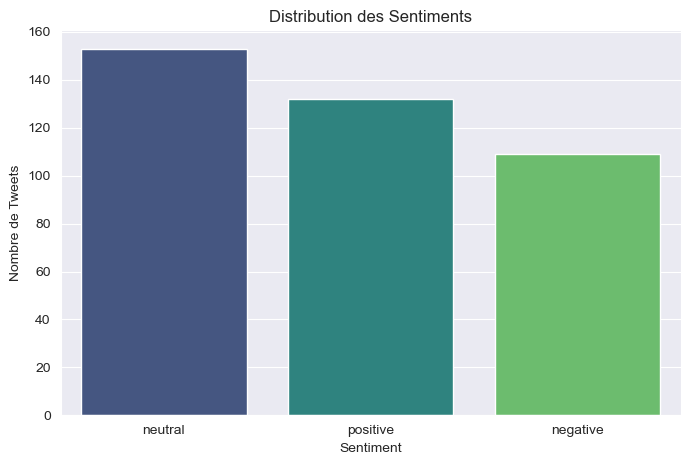


Répartition des sentiments :
sentiment
neutral     38.832487
positive    33.502538
negative    27.664975
Name: proportion, dtype: float64


In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Tweets')
plt.show()

# Afficher les comptes exacts
print("\nRépartition des sentiments :")
print(df['sentiment'].value_counts(normalize=True) * 100) # En pourcentage


#### Les sentiments sont relativement équilibrés, avec une légère dominance des tweets neutres.

### 2.2 Analyse des variables temporelles


C:\Users\donfa\AppData\Local\Temp\ipykernel_14684\2605264662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index, palette='magma')


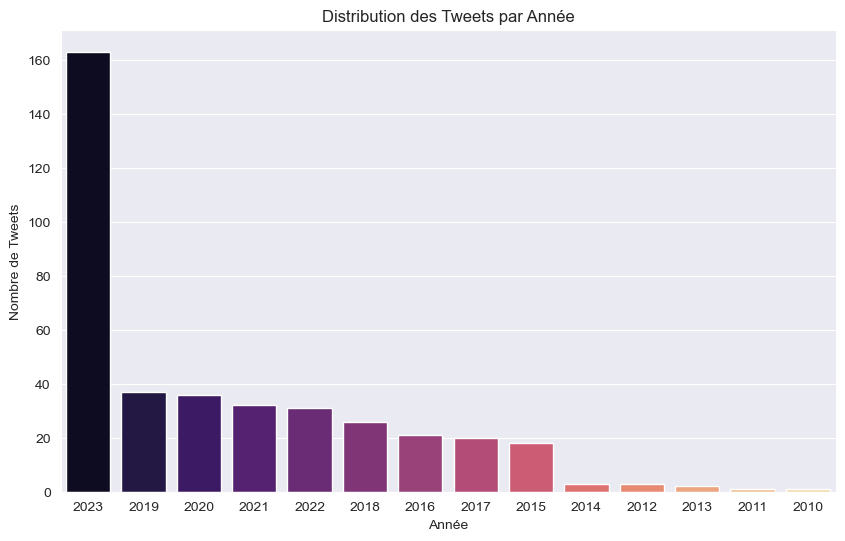

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index, palette='magma')
plt.title('Distribution des Tweets par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Tweets')
plt.show()


#### Une grande partie des tweets datent de 2023 et le reste est plus entre 2019 et 2015 , ils sont donc relativement ressents , ainsi les comportements et la façon d'écrire ne souffriront pas de l'époque

C:\Users\donfa\AppData\Local\Temp\ipykernel_14684\742098872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time of Tweet', order=df['Time of Tweet'].value_counts().index, palette='plasma')


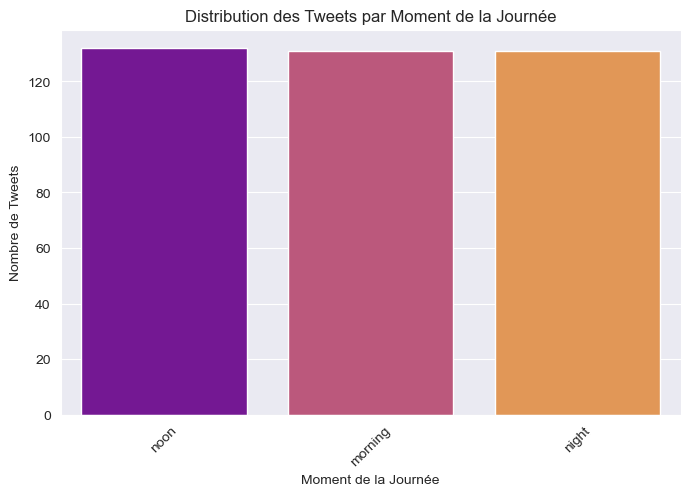

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time of Tweet', order=df['Time of Tweet'].value_counts().index, palette='plasma')
plt.title('Distribution des Tweets par Moment de la Journée')
plt.xlabel('Moment de la Journée')
plt.ylabel('Nombre de Tweets')
plt.xticks(rotation=45)
plt.show()

#### Il y a un équilibre entre les tweets postés le matin, à midi et le soir. Cela pourrait indiquer que les utilisateurs tweetent de manière relativement uniforme tout au long de la journée.

### 2.3 Analyse de la variable 'Platform'

C:\Users\donfa\AppData\Local\Temp\ipykernel_14684\4210966611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Platform', order=df['Platform'].value_counts().index, palette='coolwarm')


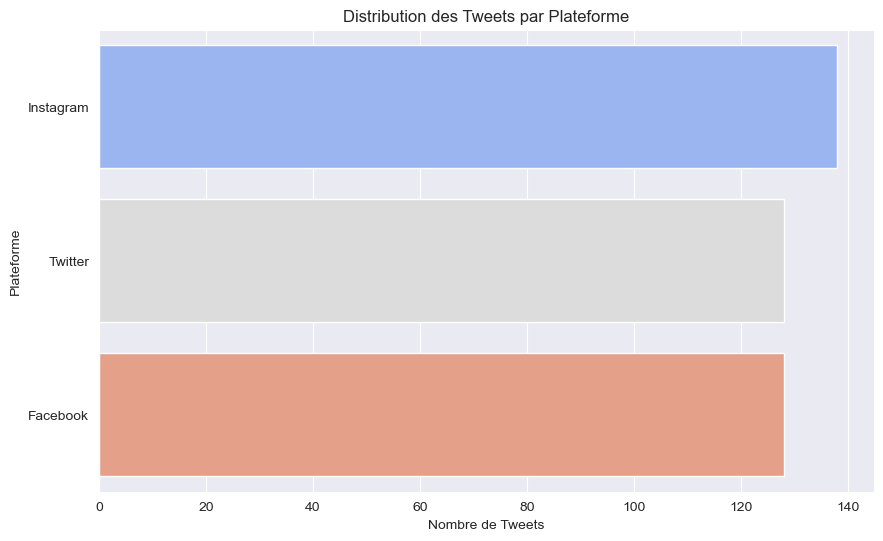

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Platform', order=df['Platform'].value_counts().index, palette='coolwarm')
plt.title('Distribution des Tweets par Plateforme')
plt.xlabel('Nombre de Tweets')
plt.ylabel('Plateforme')
plt.show()


#### La majorite des tweets viennent d'instagram

### 2.4 Analyse de base de la variable 'text'


#### 2.4.1 Longueur des tweets (nombre de caractères)

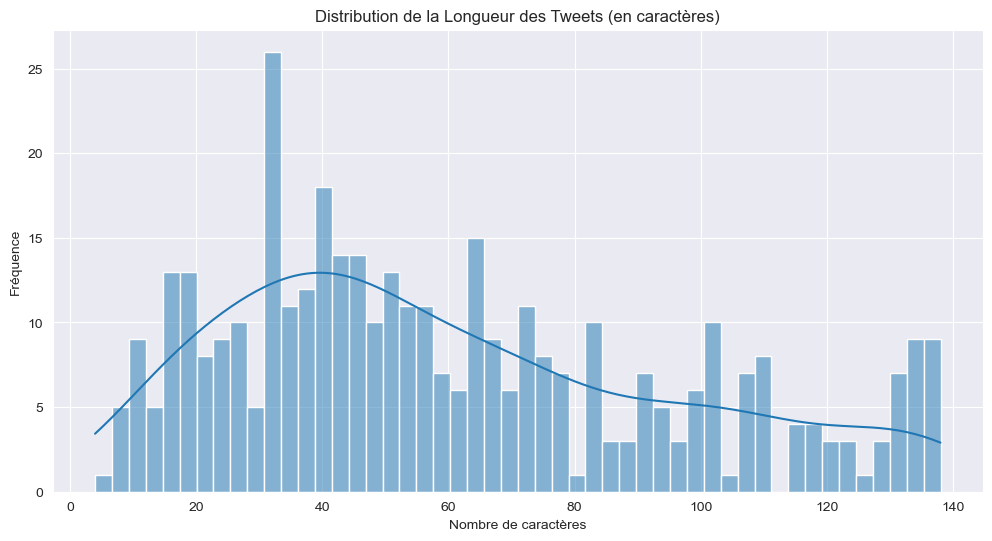


Statistiques sur la longueur des tweets (caractères) :
count    394.000000
mean      60.507614
std       35.259578
min        4.000000
25%       33.000000
50%       53.000000
75%       84.000000
max      138.000000
Name: text_length, dtype: float64


In [11]:
df['text_length'] = df['text'].astype(str).apply(len) # Assurer que c'est une string
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', kde=True, bins=50)
plt.title('Distribution de la Longueur des Tweets (en caractères)')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.show()
print("\nStatistiques sur la longueur des tweets (caractères) :")
print(df['text_length'].describe())



#### La plupart des tweets sont relativement courts, avec une longueur moyenne d'environ 60 caractères. Cela est cohérent avec la nature des tweets, qui sont souvent concis.

#### 2.4.2 Nombre de mots par tweet

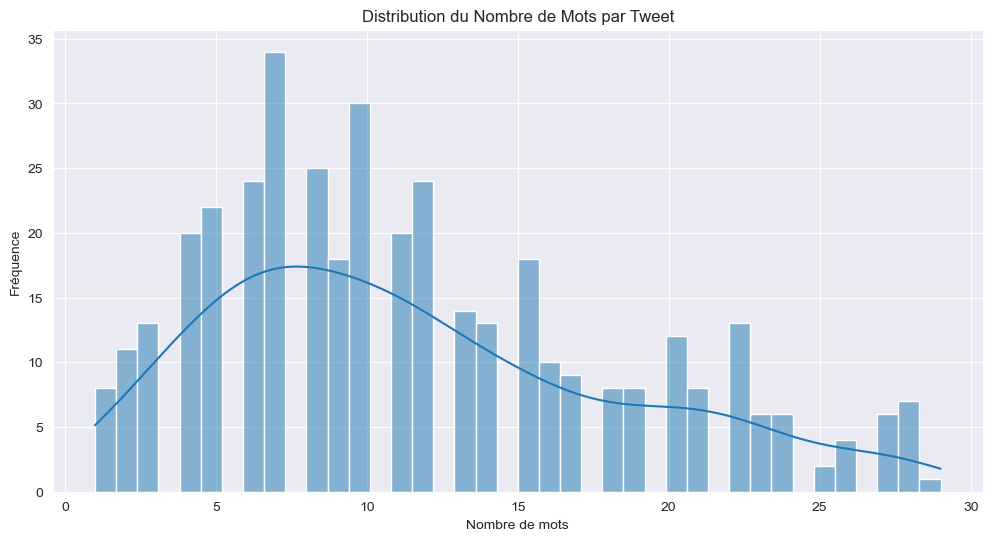


Statistiques sur le nombre de mots par tweet :
count    394.000000
mean      11.601523
std        6.764757
min        1.000000
25%        7.000000
50%       10.000000
75%       16.000000
max       29.000000
Name: word_count, dtype: float64


In [12]:
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', kde=True, bins=40)
plt.title('Distribution du Nombre de Mots par Tweet')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()
print("\nStatistiques sur le nombre de mots par tweet :")
print(df['word_count'].describe())


#### La plupart des tweets contiennent entre 5 et 15 mots, avec une moyenne d'environ 11 mots. Cela est également cohérent avec la nature des tweets.
On voit la plage typique de longueur des messages. Y a-t-il beaucoup de tweets très courts ou très longs ? Ces caractéristiques pourraient potentiellement être corrélées au sentiment. Par exemple, les messages négatifs sont-ils souvent plus courts/longs ? (À vérifier dans l'analyse bivariée).

#### 2.4.3 Nuages de mots par sentiment 

In [16]:
def generate_wordcloud(sentiment_type, color, background_color):
    """Génère et affiche un nuage de mots pour un sentiment donné."""
    text_list = df[df["sentiment"] == sentiment_type]["text"].astype(str).tolist()

    if not text_list:
        print(f"Aucun texte trouvé pour le sentiment '{sentiment_type}'.")
        return

    # Joindre tous les textes en une seule chaîne
    full_text = ' '.join(text_list)

    # Créer le nuage de mots
    # Note: On pourrait ajouter des stopwords ici si on voulait un nuage plus propre
    stop_words_wc = set(stopwords.words('english')) # Exemple
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color=background_color,
        colormap=color,
        width=800,
        height=600,
        stopwords=stop_words_wc # Optionnel: ajouter les stopwords
    ).generate(full_text)

    # Afficher le nuage de mots
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Nuage de mots pour les sentiments "{sentiment_type}"', fontsize=16)
    plt.show()

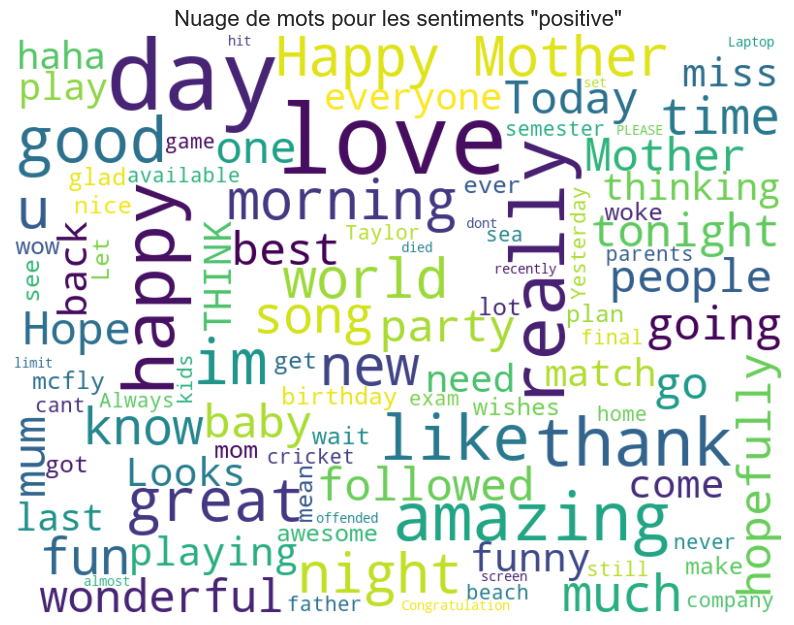

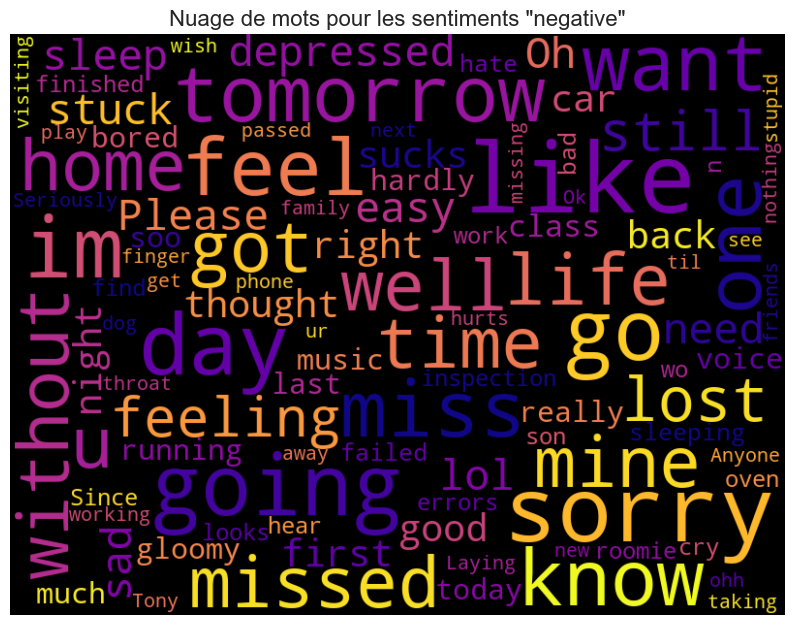

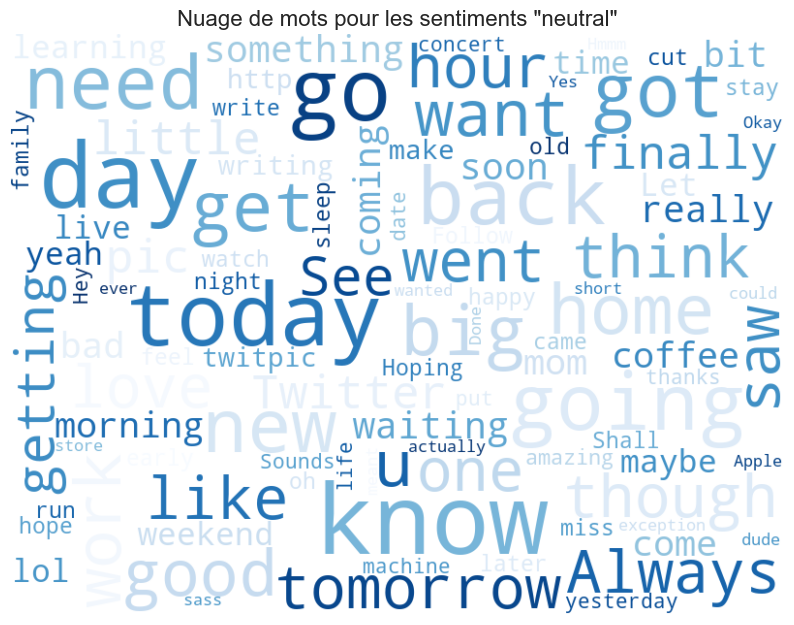

In [17]:

# Générer les nuages de mots pour chaque sentiment
generate_wordcloud("positive", "viridis", "white")
generate_wordcloud("negative", "plasma", "black")
generate_wordcloud("neutral", "Blues", "white")

#### Les nuages de mots montrent les mots les plus fréquents associés à chaque sentiment. Cela peut donner une idée des thèmes ou des émotions dominants dans chaque catégorie. et au vus des resultats , ils sont assez representatifs en effet avec des mots comme 'happy' dans les tweets positifs

### ==============================================================================
# Phase 3 : Analyse bivariée - Exploration des relations entre variables
### ==============================================================================

## 3.1 Relation entre Sentiment et Plateforme

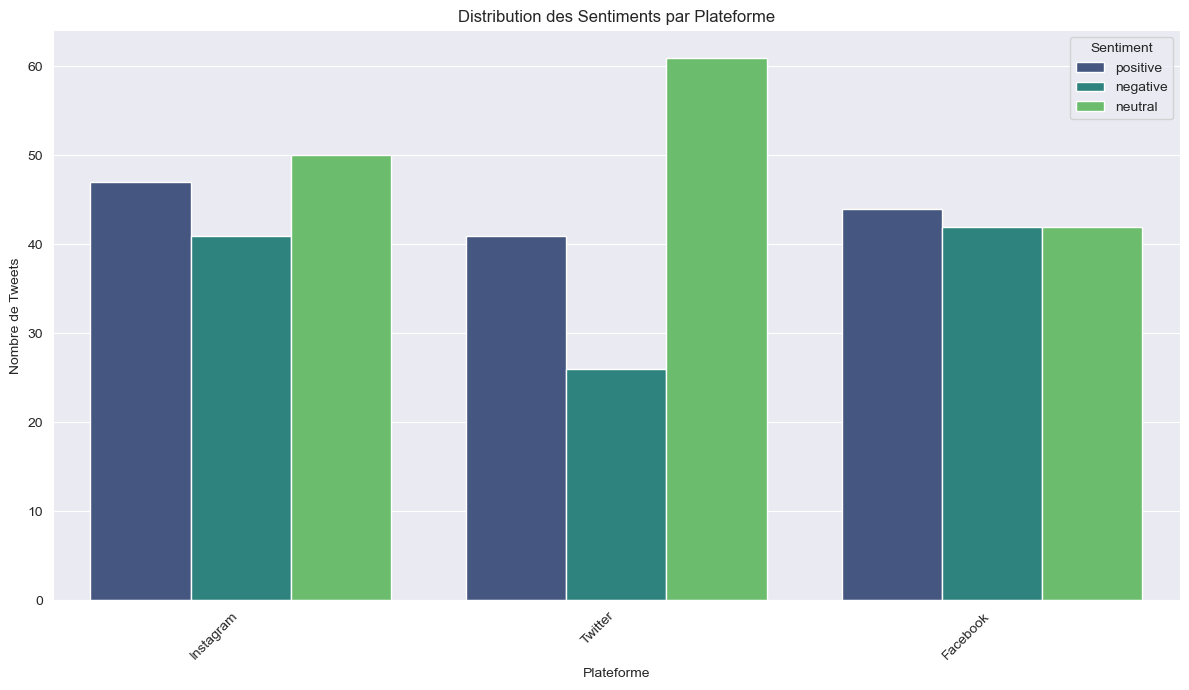

In [18]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Platform', hue='sentiment', palette='viridis', order=df['Platform'].value_counts().index)
plt.title('Distribution des Sentiments par Plateforme')
plt.xlabel('Plateforme')
plt.ylabel('Nombre de Tweets')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout() # Ajuste pour éviter les superpositions
plt.show()


#### On voit que la majorité des tweets positifs proviennent de Instagram, tandis que les tweets négatifs sont plus fréquents sur Facebook. Cela pourrait indiquer des différences dans la façon dont les utilisateurs expriment leurs sentiments sur différentes plateformes.

## 3.2 Relation entre Sentiment et Moment de la Journée (Code 2 - amélioré)

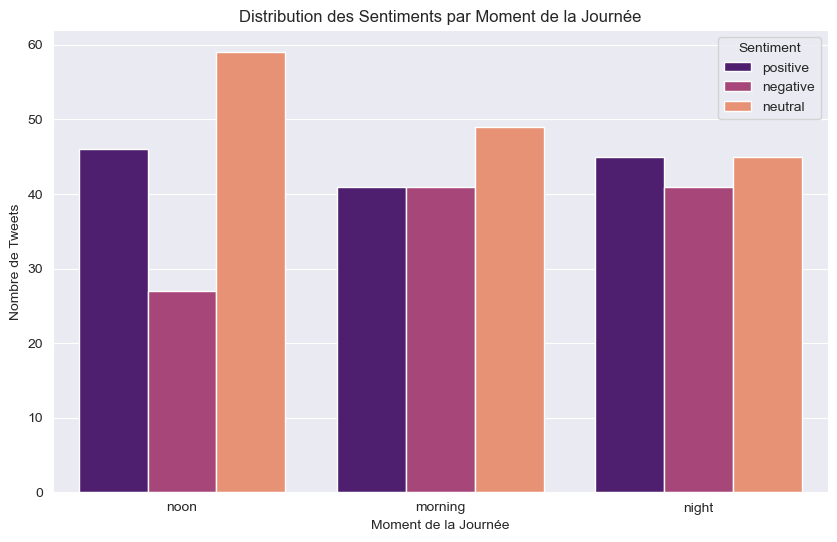

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time of Tweet', hue='sentiment', palette='magma', order=df['Time of Tweet'].value_counts().index)
plt.title('Distribution des Sentiments par Moment de la Journée')
plt.xlabel('Moment de la Journée')
plt.ylabel('Nombre de Tweets')
plt.legend(title='Sentiment')
plt.show()


#### On voit que les tweets positifs sont plus fréquents le matin et à midi, tandis que les tweets négatifs sont plus fréquents le soir. Cela pourrait indiquer des différences dans l'humeur des utilisateurs selon le moment de la journée.

## 3.3 Relation entre Sentiment et Année (Code 2)

<Figure size 1200x700 with 0 Axes>

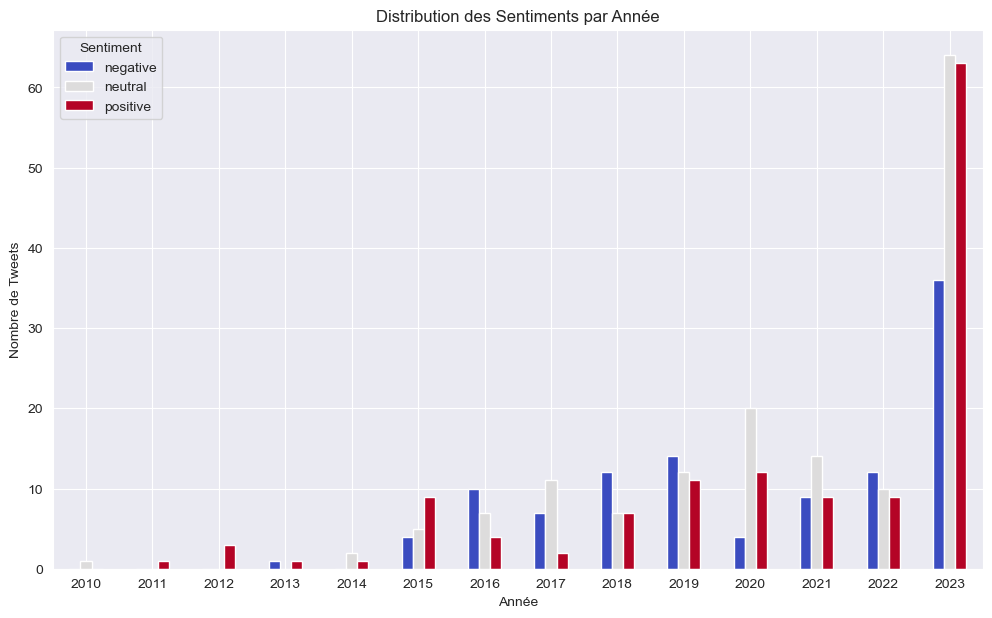

In [20]:
plt.figure(figsize=(12, 7))
# Utiliser groupby pour obtenir les comptes et les afficher en barres groupées
df.groupby('Year')['sentiment'].value_counts().unstack().plot(kind='bar', figsize=(12,7), colormap='coolwarm')
plt.title('Distribution des Sentiments par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


#### On voit que la majorité des tweets positifs proviennent de 2015, tandis que les tweets négatifs sont plus fréquents en 2020. Cela pourrait indiquer des différences dans l'humeur des utilisateurs selon l'année.

## 3.4 Relation entre Sentiment et Longueur du Texte

C:\Users\donfa\AppData\Local\Temp\ipykernel_14684\3225477454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='text_length', palette='plasma')


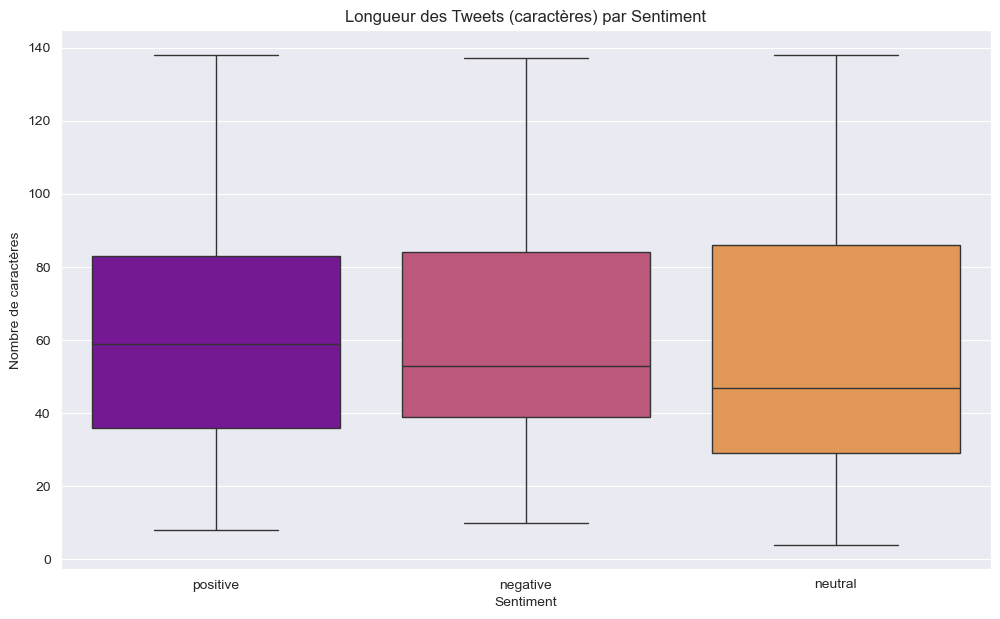

C:\Users\donfa\AppData\Local\Temp\ipykernel_14684\3225477454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='word_count', palette='viridis')


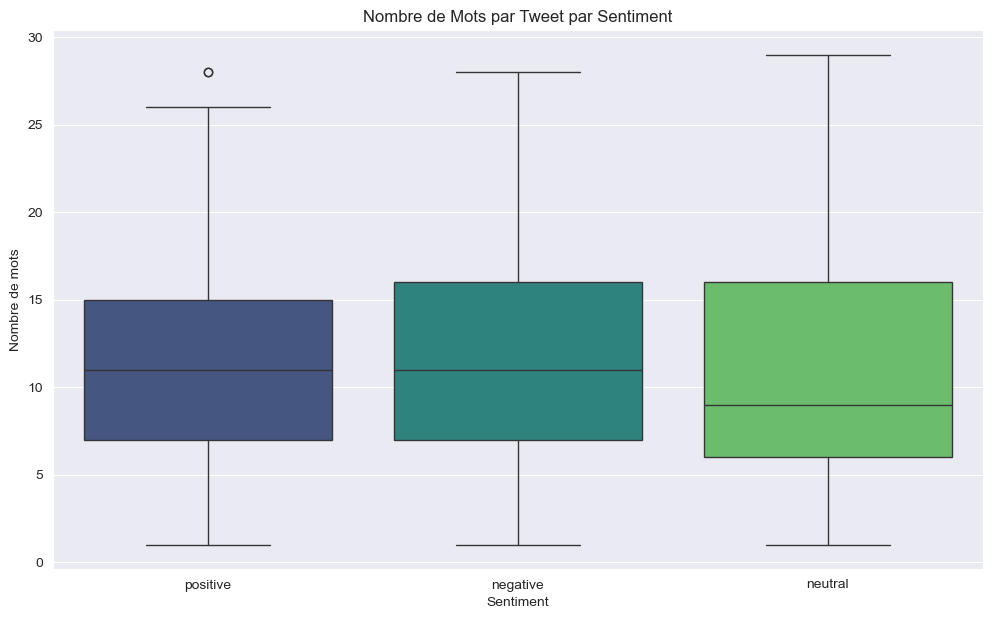

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='sentiment', y='text_length', palette='plasma')
plt.title('Longueur des Tweets (caractères) par Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de caractères')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='sentiment', y='word_count', palette='viridis')
plt.title('Nombre de Mots par Tweet par Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de mots')
plt.show()


#### On voit que les tweets négatifs sont généralement plus longs que les tweets positifs et neutres. Cela pourrait indiquer que les utilisateurs prennent plus de temps pour exprimer des sentiments négatifs, ou que ces sentiments nécessitent plus de contexte.


Top 10 combinaisons Plateforme/Année/Sentiment :
Platform   Year  sentiment
Twitter    2023  neutral      27
Instagram  2023  positive     25
Twitter    2023  positive     22
Instagram  2023  neutral      20
Facebook   2023  neutral      17
                 positive     16
                 negative     15
Instagram  2023  negative     12
Twitter    2023  negative      9
Instagram  2020  neutral       8
Name: count, dtype: int64


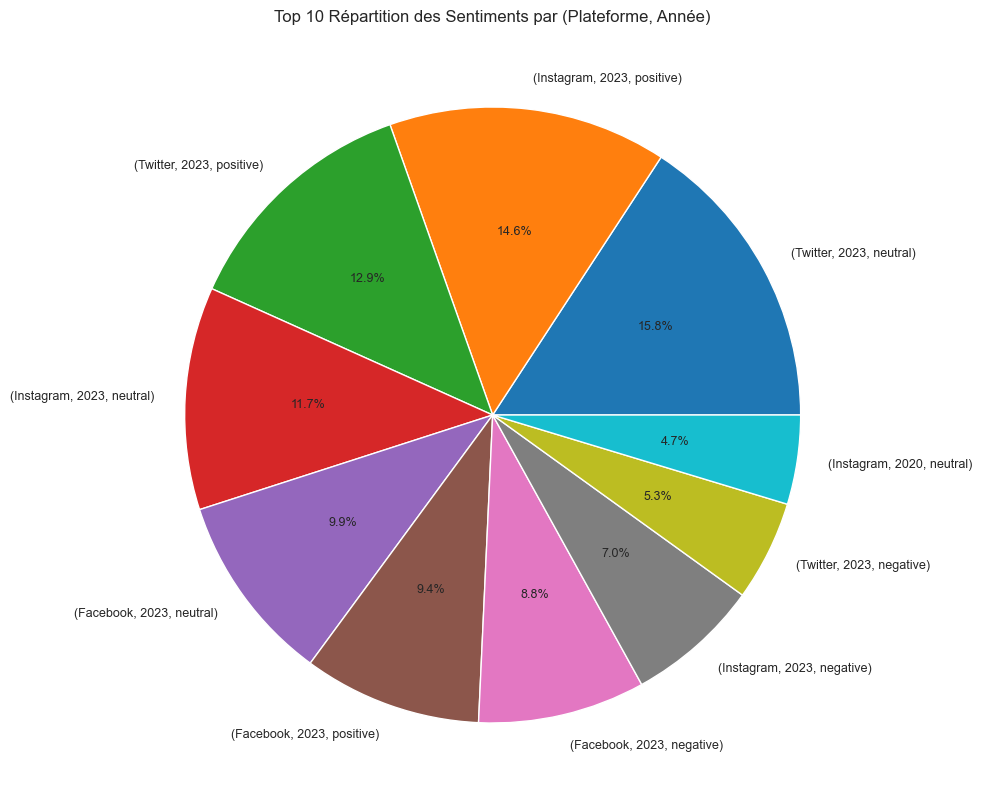

In [22]:
# Note: Les pie charts sont souvent difficiles à lire pour des comparaisons fines, surtout avec beaucoup de catégories.

print("\nTop 10 combinaisons Plateforme/Année/Sentiment :")
top_combinations = df.groupby(['Platform','Year']).sentiment.value_counts().sort_values(ascending = False).head(10)
print(top_combinations)

plt.figure(figsize=(10, 10))
top_combinations.plot(kind='pie', autopct='%1.1f%%', ylabel='', textprops={'fontsize': 9})
plt.title('Top 10 Répartition des Sentiments par (Plateforme, Année)')
plt.show()

## ==============================================================================
# Phase 4 : Prétraitement du texte (inspiré des deux codes)
## ==============================================================================

In [23]:
print("Exemple de texte original :\n", df['text'].iloc[2]) 

nltk.download('stopwords') # Assurer que les stopwords sont téléchargés
stop_words = set(stopwords.words('english'))
print(f"\nNombre de stopwords anglais : {len(stop_words)}")
print("Exemples de stopwords :", list(stop_words)[:10])


Exemple de texte original :
 Don't angry me

Nombre de stopwords anglais : 198
Exemples de stopwords : ['couldn', 'hasn', 'your', 'm', 'of', 'nor', 'did', "couldn't", 'having', 'other']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\donfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Initialiser le Stemmer 
ps = PorterStemmer()
# Alternative : Lemmatizer (souvent préférable car donne des mots réels)
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# Fonction de nettoyage et de stemming 
def preprocess_text(text):
    # S'assurer que l'entrée est une chaîne de caractères
    text = str(text)
    # 1. Mettre en minuscule
    text = text.lower()
    # 2. Supprimer les caractères non alphabétiques (garde les espaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Tokenization (séparer en mots)
    tokens = word_tokenize(text)
    # 4. Supprimer les stopwords et appliquer le stemming (ou lemmatization)
    # stemmed_tokens = [ps.stem(word) for word in tokens if word not in stop_words and len(word) > 1] # len>1 pour éviter les lettres seules
    # Alternative avec Lemmatization:
    # lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    # On garde le stemming ici pour suivre le code 2
    processed_tokens = [ps.stem(word) for word in tokens if word not in stop_words and len(word) > 1]
    # 5. Rejoindre les tokens en une seule chaîne
    return " ".join(processed_tokens)

# Appliquer la fonction de prétraitement à la colonne 'text'
# Créons une nouvelle colonne pour comparer
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Afficher le même exemple après nettoyage
print("\nMême exemple après nettoyage et stemming :\n", df['cleaned_text'].iloc[2]) 

# Comparer les 5 premiers textes originaux et nettoyés
print("\nComparaison avant/après nettoyage :")
display(df[['text', 'cleaned_text']].head())



Même exemple après nettoyage et stemming :
 dont angri

Comparaison avant/après nettoyage :


,text,cleaned_text
0,What a great day!!! Looks like dream.,great day look like dream
1,"I feel sorry, I miss you here in the sea beach",feel sorri miss sea beach
2,Don't angry me,dont angri
3,We attend in the class just for listening teachers reading on slide. Just Nonsence,attend class listen teacher read slide nonsenc
4,"Those who want to go, let them go",want go let go



Statistiques sur le nombre de mots après nettoyage :
count    394.000000
mean       6.385787
std        3.649867
min        0.000000
25%        3.250000
50%        6.000000
75%        9.000000
max       17.000000
Name: cleaned_word_count, dtype: float64


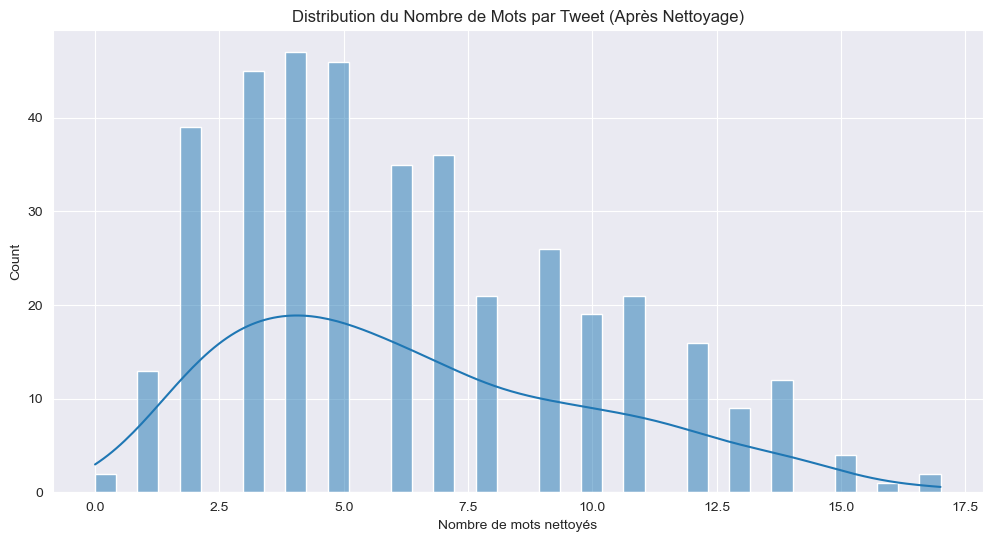

In [25]:

# Recalculer le nombre de mots après nettoyage 
df['cleaned_word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
print("\nStatistiques sur le nombre de mots après nettoyage :")
print(df['cleaned_word_count'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df['cleaned_word_count'], bins=40, kde=True)
plt.title('Distribution du Nombre de Mots par Tweet (Après Nettoyage)')
plt.xlabel('Nombre de mots nettoyés')
plt.show()


#### On voit que la plupart des tweets nettoyés contiennent entre 2 et 10 mots, avec une moyenne d'environ 6 mots. Cela est cohérent avec la nature des tweets, qui sont souvent concis. Le nettoyage a réduit le nombre de mots dans les tweets, ce qui est attendu , environ la moitie


Nuages de mots sur texte nettoyé :


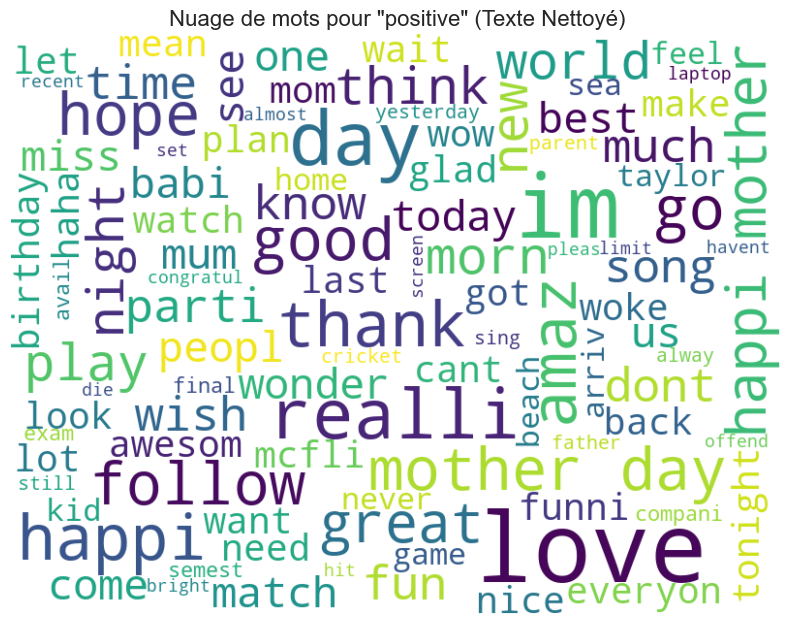

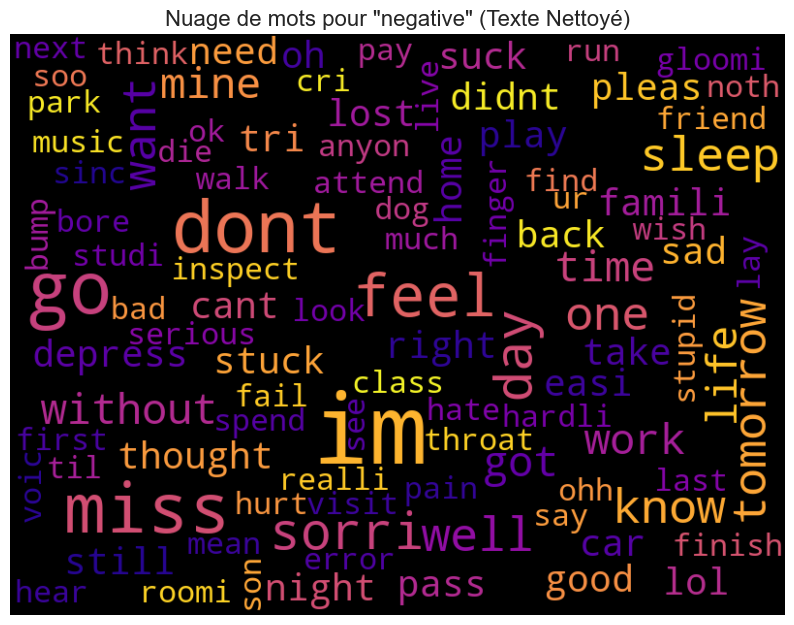

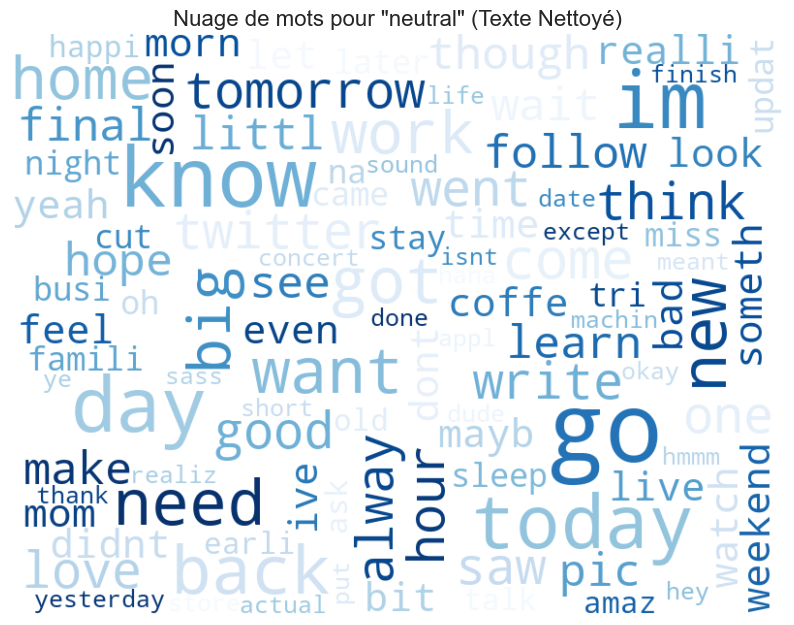

In [26]:

# Re-générer un nuage de mots sur le texte nettoyé pour voir la différence
def generate_cleaned_wordcloud(sentiment_type, color, background_color):
    """Génère un nuage de mots à partir du texte nettoyé."""
    text_list = df[df["sentiment"] == sentiment_type]["cleaned_text"].astype(str).tolist()
    if not text_list: return
    full_text = ' '.join(text_list)
    if not full_text.strip(): # Vérifier si le texte n'est pas vide après nettoyage
         print(f"Le texte nettoyé pour '{sentiment_type}' est vide ou ne contient que des espaces.")
         return
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color=background_color,
                          colormap=color, width=800, height=600).generate(full_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Nuage de mots pour "{sentiment_type}" (Texte Nettoyé)', fontsize=16)
    plt.show()

print("\nNuages de mots sur texte nettoyé :")
generate_cleaned_wordcloud("positive", "viridis", "white")
generate_cleaned_wordcloud("negative", "plasma", "black")
generate_cleaned_wordcloud("neutral", "Blues", "white")


In [27]:

# Analyse de la fréquence des mots après nettoyage (plus précis que word cloud)
# Utilisation de CountVectorizer  pour compter les mots (unigrammes)
from sklearn.feature_extraction.text import CountVectorizer

# On peut analyser tous les textes nettoyés ensemble
vectorizer_all = CountVectorizer()
all_text_counts = vectorizer_all.fit_transform(df['cleaned_text'])
word_freq_all = pd.DataFrame(all_text_counts.sum(axis=0), columns=vectorizer_all.get_feature_names_out()).T
word_freq_all.columns = ['frequency']
word_freq_all = word_freq_all.sort_values(by='frequency', ascending=False)

print("\nTop 30 mots les plus fréquents (après nettoyage) dans tout le dataset :")
display(word_freq_all.head(30))



Top 30 mots les plus fréquents (après nettoyage) dans tout le dataset :


,frequency
im,57
go,40
day,39
love,28
know,24
like,22
dont,20
get,18
happi,18
miss,17


#### im, go day, love ,know sont les plus frequents

In [28]:

# On peut aussi le faire par sentiment
def get_top_n_words(corpus, n=20):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

print("\nTop 20 mots pour les sentiments POSITIFS (après nettoyage):")
positive_words = get_top_n_words(df[df['sentiment'] == 'positive']['cleaned_text'])
print(positive_words)

print("\nTop 20 mots pour les sentiments NEGATIFS (après nettoyage):")
negative_words = get_top_n_words(df[df['sentiment'] == 'negative']['cleaned_text'])
print(negative_words)

print("\nTop 20 mots pour les sentiments NEUTRES (après nettoyage):")
neutral_words = get_top_n_words(df[df['sentiment'] == 'neutral']['cleaned_text'])
print(neutral_words)



Top 20 mots pour les sentiments POSITIFS (après nettoyage):
[('love', 23), ('day', 21), ('im', 19), ('happi', 16), ('realli', 11), ('mother', 11), ('like', 9), ('amaz', 9), ('thank', 9), ('good', 8), ('go', 8), ('follow', 8), ('hope', 8), ('great', 7), ('play', 6), ('new', 6), ('world', 6), ('that', 6), ('think', 6), ('morn', 6)]

Top 20 mots pour les sentiments NEGATIFS (après nettoyage):
[('im', 25), ('dont', 12), ('go', 12), ('miss', 11), ('feel', 8), ('like', 8), ('sorri', 6), ('day', 6), ('want', 5), ('well', 5), ('sleep', 5), ('know', 5), ('tomorrow', 5), ('one', 5), ('got', 4), ('mine', 4), ('work', 4), ('life', 4), ('that', 4), ('without', 4)]

Top 20 mots pour les sentiments NEUTRES (après nettoyage):
[('go', 20), ('know', 14), ('im', 13), ('day', 12), ('today', 11), ('get', 11), ('back', 9), ('need', 8), ('got', 8), ('want', 8), ('big', 7), ('work', 7), ('home', 7), ('come', 6), ('love', 5), ('like', 5), ('alway', 5), ('went', 5), ('tomorrow', 5), ('new', 5)]


#### On voit que les mots les plus fréquents sont souvent des verbes ou des adjectifs, ce qui est logique dans le contexte des tweets. Les mots comme "love", "happy", "good" sont typiques des sentiments positifs, tandis que "hate", "bad", "sad" sont typiques des sentiments négatifs.

In [29]:
def get_top_n_bigrams(corpus, n=20):
    # Utilise CountVectorizer avec ngram_range=(2, 2) pour les bigrammes
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

print("\nTop 20 BIGRAMMES pour les sentiments POSITIFS (après nettoyage):")
positive_bigrams = get_top_n_bigrams(df[df['sentiment'] == 'positive']['cleaned_text'])
print(positive_bigrams)

print("\nTop 20 BIGRAMMES pour les sentiments NEGATIFS (après nettoyage):")
negative_bigrams = get_top_n_bigrams(df[df['sentiment'] == 'negative']['cleaned_text'])
print(negative_bigrams)

print("\nTop 20 BIGRAMMES pour les sentiments NEUTRES (après nettoyage):")
neutral_bigrams = get_top_n_bigrams(df[df['sentiment'] == 'neutral']['cleaned_text'])
print(neutral_bigrams)


Top 20 BIGRAMMES pour les sentiments POSITIFS (après nettoyage):
[('mother day', 8), ('happi mother', 7), ('realli great', 3), ('happi birthday', 3), ('great day', 2), ('look like', 2), ('sea beach', 2), ('semest final', 2), ('final exam', 2), ('day mom', 2), ('im think', 2), ('think im', 2), ('im go', 2), ('go fun', 2), ('follow us', 2), ('us recent', 2), ('recent pleas', 2), ('pleas dont', 2), ('dont offend', 2), ('offend havent', 2)]

Top 20 BIGRAMMES pour les sentiments NEGATIFS (après nettoyage):
[('want go', 4), ('lost voic', 2), ('im sorri', 2), ('feel gloomi', 2), ('fail inspect', 2), ('look like', 2), ('sorri hear', 2), ('go well', 2), ('im sad', 2), ('feel like', 2), ('dont know', 2), ('dont angri', 1), ('attend class', 1), ('class listen', 1), ('listen teacher', 1), ('teacher read', 1), ('read slide', 1), ('slide nonsenc', 1), ('go let', 1), ('let go', 1)]

Top 20 BIGRAMMES pour les sentiments NEUTRES (après nettoyage):
[('saw amaz', 2), ('come back', 2), ('today go', 2), (